In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Titanic-Dataset.csv')
print("Dataset loaded successfully.")
print("First 5 rows of the dataset:")
print(df.head())

Dataset loaded successfully.
First 5 rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S

In [ ]:
print("----------- Summary Statistics for Numerical Features -----------")
print(df.describe())

print("\n----------- Summary of Missing Values -----------")
print(df.isnull().sum())


print("\n----------- Value Counts for Key Categorical Features -----------")
print("\nSurvival Counts (1 = Survived, 0 = Deceased):")
print(df['Survived'].value_counts())

print("\nPassenger Class Counts:")
print(df['Pclass'].value_counts())

print("\nSex Counts:")
print(df['Sex'].value_counts())

print("\nPort of Embarkation Counts:")
print(df['Embarked'].value_counts())

----------- Summary Statistics for Numerical Features -----------
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

----------- Su

In [ ]:

print("----------- Outlier Detection -----------")
df_outliers = df.copy()

df_outliers['Age'] = df_outliers['Age'].fillna(df_outliers['Age'].median())

print("\n--- Analyzing 'Fare' for Outliers ---")
Q1_fare = df_outliers['Fare'].quantile(0.25)
Q3_fare = df_outliers['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare

fare_lower_bound = Q1_fare - 1.5 * IQR_fare
fare_upper_bound = Q3_fare + 1.5 * IQR_fare

print(f"Fare Q1: {Q1_fare:.2f}, Q3: {Q3_fare:.2f}, IQR: {IQR_fare:.2f}")
print(f"Fare Outlier Upper Boundary: > {fare_upper_bound:.2f}")


fare_outliers = df_outliers[df_outliers['Fare'] > fare_upper_bound]
print(f"\nNumber of outliers detected in 'Fare': {len(fare_outliers)}")

print("Top 5 passengers with outlier fares:")
print(fare_outliers.sort_values('Fare', ascending=False).head())

print("\n\n--- Analyzing 'Age' for Outliers ---")
Q1_age = df_outliers['Age'].quantile(0.25)
Q3_age = df_outliers['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

age_lower_bound = Q1_age - 1.5 * IQR_age
age_upper_bound = Q3_age + 1.5 * IQR_age

print(f"Age Q1: {Q1_age:.2f}, Q3: {Q3_age:.2f}, IQR: {IQR_age:.2f}")
print(f"Age Outlier Boundaries: < {age_lower_bound:.2f} or > {age_upper_bound:.2f}")
age_outliers = df_outliers[(df_outliers['Age'] < age_lower_bound) | (df_outliers['Age'] > age_upper_bound)]
print(f"\nNumber of outliers detected in 'Age': {len(age_outliers)}")

print("Passengers with outlier ages (oldest first):")
print(age_outliers.sort_values('Age', ascending=False).head(10))

----------- Outlier Detection -----------

--- Analyzing 'Fare' for Outliers ---
Fare Q1: 7.91, Q3: 31.00, IQR: 23.09
Fare Outlier Upper Boundary: > 65.63

Number of outliers detected in 'Fare': 116
Top 5 passengers with outlier fares:
     PassengerId  Survived  Pclass                                Name  \
258          259         1       1                    Ward, Miss. Anna   
737          738         1       1              Lesurer, Mr. Gustave J   
679          680         1       1  Cardeza, Mr. Thomas Drake Martinez   
27            28         0       1      Fortune, Mr. Charles Alexander   
341          342         1       1      Fortune, Miss. Alice Elizabeth   

        Sex   Age  SibSp  Parch    Ticket      Fare        Cabin Embarked  
258  female  35.0      0      0  PC 17755  512.3292          NaN        C  
737    male  35.0      0      0  PC 17755  512.3292         B101        C  
679    male  36.0      0      1  PC 17755  512.3292  B51 B53 B55        C  
27     male  19

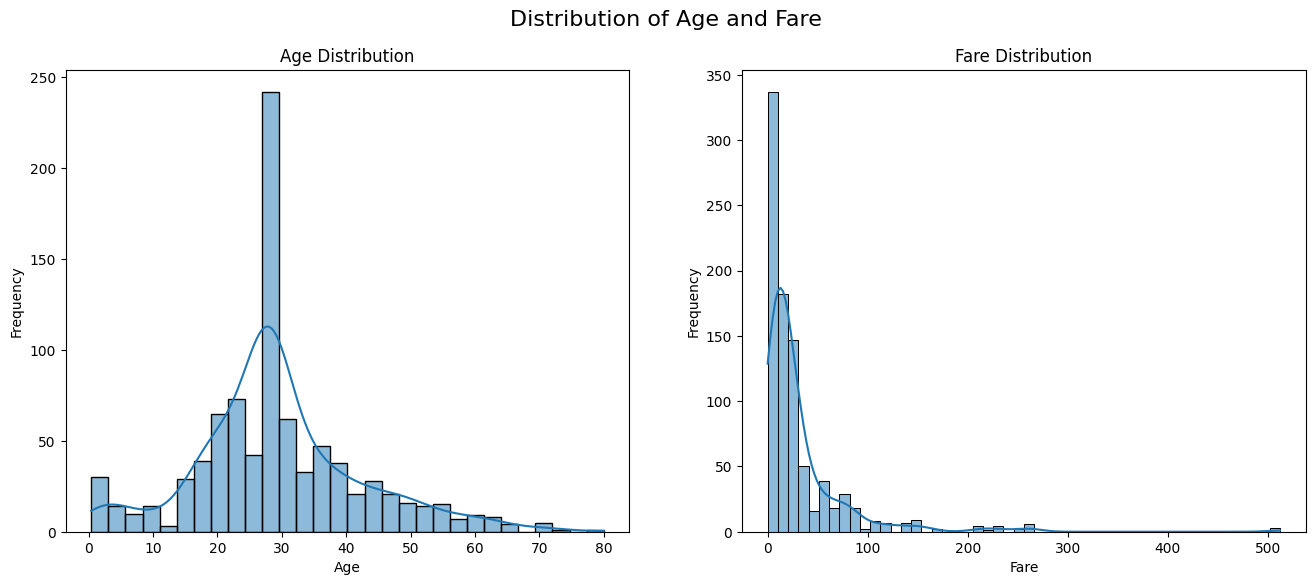

In [ ]:
df_vis = df.copy()
df_vis['Age'] = df_vis['Age'].fillna(df_vis['Age'].median())

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Distribution of Age and Fare', fontsize=16)


sns.histplot(df_vis['Age'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')


sns.histplot(df['Fare'], bins=50, kde=True, ax=axes[1])
axes[1].set_title('Fare Distribution')
axes[1].set_xlabel('Fare')
axes[1].set_ylabel('Frequency')

plt.show()

C:\Users\STUDENT\AppData\Local\Temp\ipykernel_14976\1132177529.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Did Not Survive', 'Survived'])
C:\Users\STUDENT\AppData\Local\Temp\ipykernel_14976\1132177529.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Did Not Survive', 'Survived'])


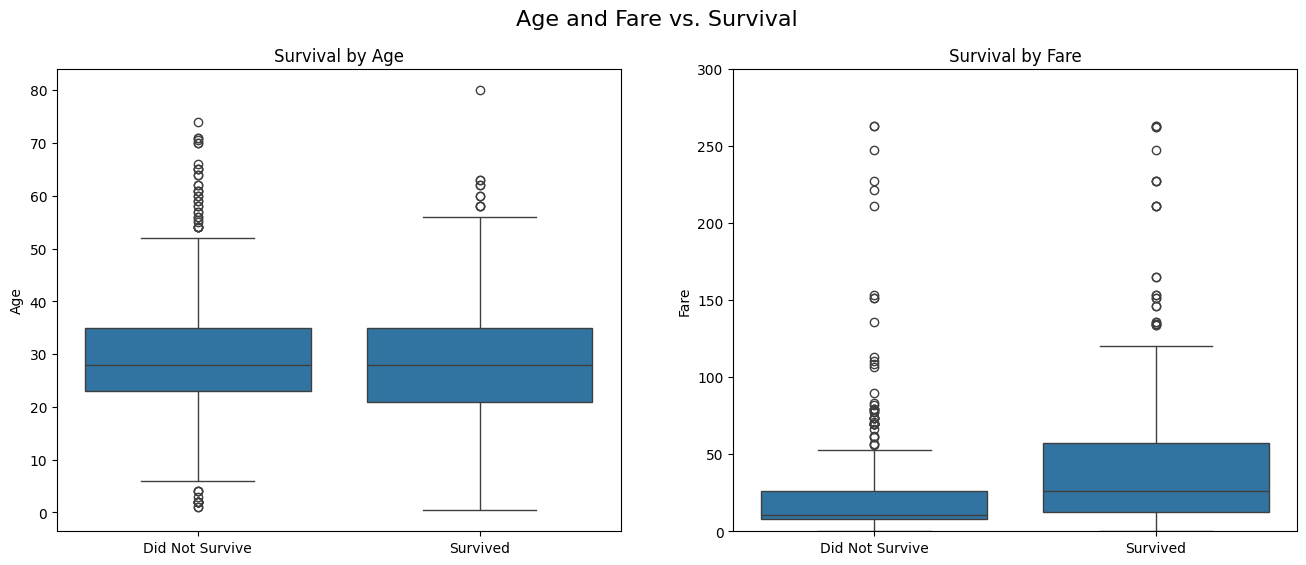

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Age and Fare vs. Survival', fontsize=16)


sns.boxplot(x='Survived', y='Age', data=df_vis, ax=axes[0])
axes[0].set_title('Survival by Age')
axes[0].set_xticklabels(['Did Not Survive', 'Survived'])
axes[0].set_xlabel('')
axes[0].set_ylabel('Age')

sns.boxplot(x='Survived', y='Fare', data=df_vis, ax=axes[1])
axes[1].set_title('Survival by Fare')
axes[1].set_xticklabels(['Did Not Survive', 'Survived'])
axes[1].set_xlabel('')
axes[1].set_ylabel('Fare')

axes[1].set_ylim(0, 300) 

plt.show()

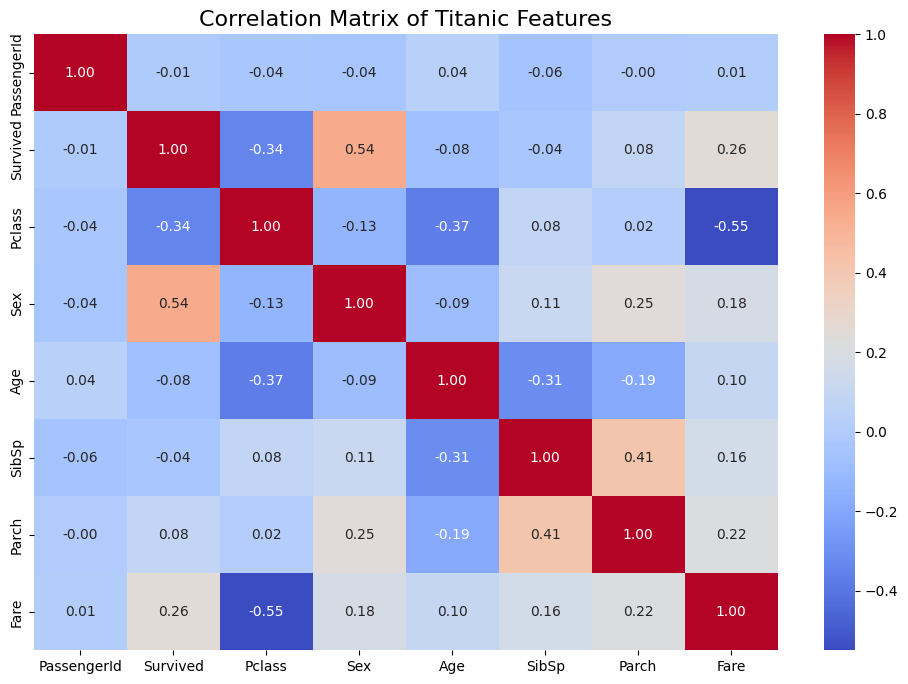

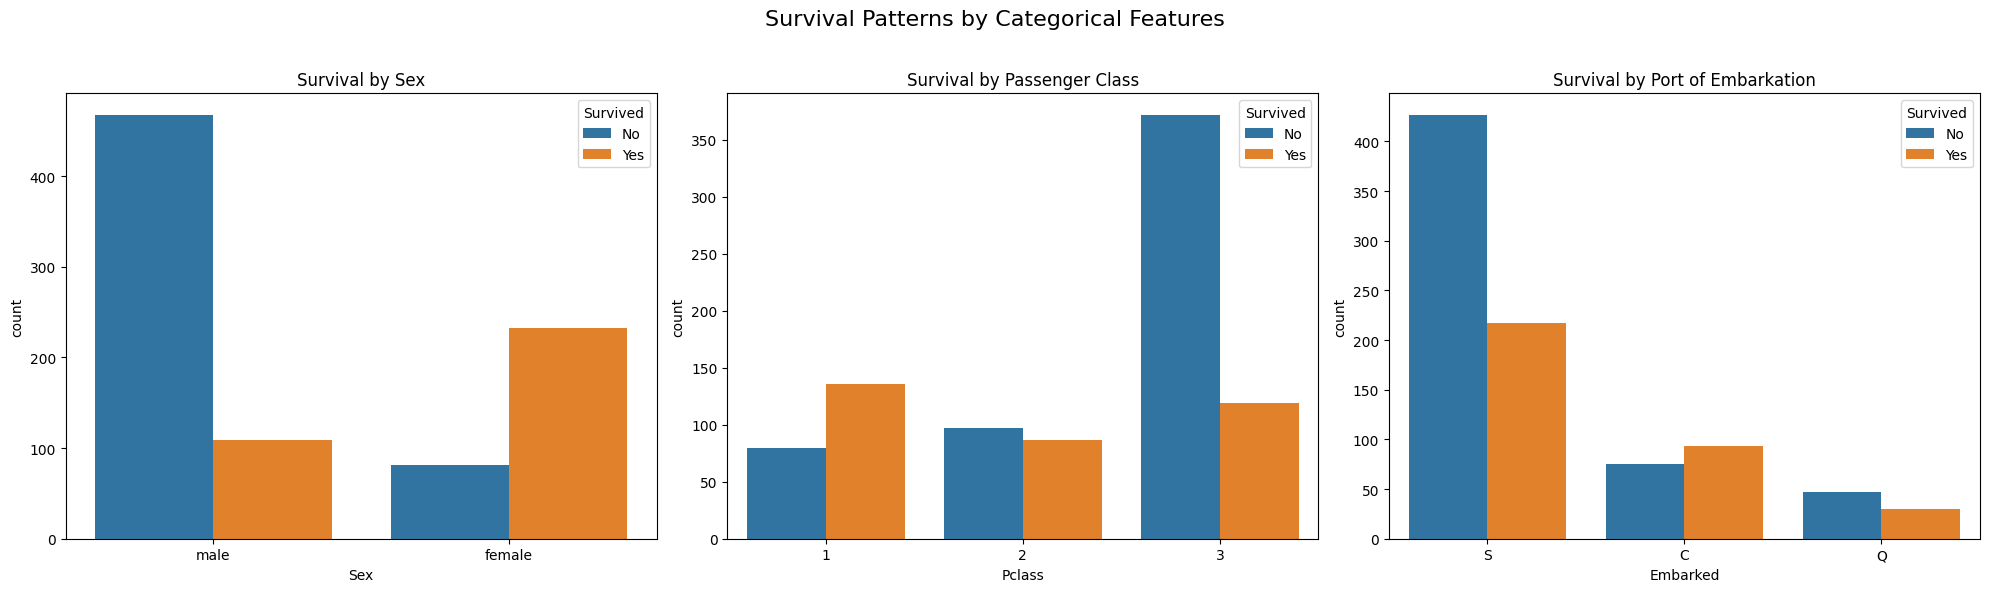

In [ ]:

df_corr = df.copy()
df_corr['Sex'] = df_corr['Sex'].map({'male': 0, 'female': 1}) # Convert sex to numeric
numeric_cols = df_corr.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Titanic Features', fontsize=16)
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Survival Patterns by Categorical Features', fontsize=16)


sns.countplot(x='Sex', hue='Survived', data=df, ax=axes[0])
axes[0].set_title('Survival by Sex')
axes[0].legend(title='Survived', labels=['No', 'Yes'])



sns.countplot(x='Pclass', hue='Survived', data=df, ax=axes[1])
axes[1].set_title('Survival by Passenger Class')
axes[1].legend(title='Survived', labels=['No', 'Yes'])


sns.countplot(x='Embarked', hue='Survived', data=df, ax=axes[2])
axes[2].set_title('Survival by Port of Embarkation')
axes[2].legend(title='Survived', labels=['No', 'Yes'])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()